## Problem Set 5

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [3]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.1", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.1 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1a (10 points)

Please load the true_labels_pred_probs.csv file from the data folder into a data frame. It contains the true labels and the predicted probabilities of class 0 and 1 in a classification problem. Class 0 indicates a patient does not have a disease, while Class 1 indicates that a patient does have the disease.

Please prepare the predicted classes for a critical probability of 25%, 50%, and 75% and create three confusion matrix plots. Put the critical probability value in the title. In a paragraph, explain how the model's performance is impacted by the critical probability with respect to the confusion matrices. Given the model's specified deployment task, what are the implications of choosing one of the critical probabilities over the other?

In [7]:
# your code here
import numpy as np
import pandas as pd
df = pd.read_csv("/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps5-XXXXiner/data/true_labels_pred_probs.csv")
df.head()

,y_true,pred_prob_class0,pred_prob_class1
0,0,0.705171,0.294829
1,0,0.811506,0.188494
2,1,0.123507,0.876493
3,0,0.932019,0.067981
4,0,0.884029,0.115971


In [8]:
pred_probs_class0 = df['pred_prob_class0']
pred_probs_class1 = df['pred_prob_class1']
y_true = df['y_true']

0      0
1      0
2      1
3      0
4      0
      ..
395    0
396    1
397    1
398    1
399    1
Name: y_true, Length: 400, dtype: int64
[1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1]
[[131  56]
 [  9 204]]


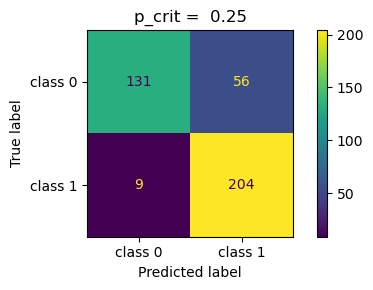

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# (1) p_crit =  0.25
p_crit =  0.25
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 <= p_crit] = 0
y_pred[pred_probs_class1 > p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print(confusion_matrix(y_true,y_pred))

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.title('p_crit =  0.25')
plt.tight_layout()
plt.show()

0      0
1      0
2      1
3      0
4      0
      ..
395    0
396    1
397    1
398    1
399    1
Name: y_true, Length: 400, dtype: int64
[0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1
 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0
 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1]
[[152  35]
 [ 34 179]]


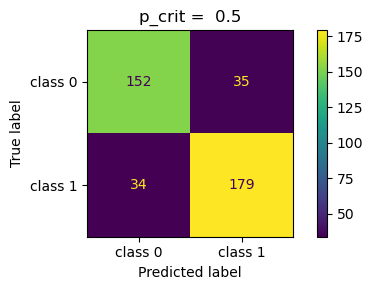

In [14]:
# (2) p_crit =  0.5
p_crit =  0.5
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 <= p_crit] = 0
y_pred[pred_probs_class1 > p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print(confusion_matrix(y_true,y_pred))

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.title('p_crit =  0.5')
plt.tight_layout()
plt.show()

0      0
1      0
2      1
3      0
4      0
      ..
395    0
396    1
397    1
398    1
399    1
Name: y_true, Length: 400, dtype: int64
[0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1]
[[171  16]
 [ 61 152]]


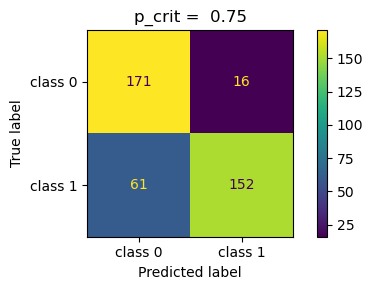

In [15]:
# (3) p_crit =  0.75
p_crit =  0.75
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 <= p_crit] = 0
y_pred[pred_probs_class1 > p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print(confusion_matrix(y_true,y_pred))

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.title('p_crit =  0.75')
plt.tight_layout()
plt.show()

**your explanation here**

1) If p_crit = 0.25, more datapoints will be predictd as class 1. So we could find that in the first figure above, the number of FP (false positive) would be larger, and the number of FN (false negative) would be smaller.

2) If p_crit = 0.5, datapoints would be predicted as class 0 and class 1 evenly. So we could find that in the second figure above, the number of FN and FN would approximately equal to each other.

3) If p_crit = 0.75, more datapoints will be predictd as class 0. So we could find that in the first figure above, the number of FP (false positive) would be smaller, and the number of FN (false negative) would be larger, which is the opposite situation of the first statement(p_crit = 0.25).

In conclusion, which critical probability we should choose depends on the data set we use. If the data set is balanced (the quantity of class 0 and class 1 in y_true is approximately equal to each other), we could choose p_crit = 0.5. However, if the data set is imbalanced, we should choose either p_crit = 0.25 or p_crit = 0.75. In specific, if more datapoints of y in true label belongs to class 1, we should choose p_crit = 0.25, so in that way more datapoints could be predicted as class 1. In contrast, if more datapoints of y in true label belongs to class 0, we should choose p_crit = 0.75, so in that way more datapoints could be predicted as class 0.

### Problem 1b (9 points)

Calculate and plot the accuracy, precision, recall, f0.5, f1, f1.5 scores using the sorted values from the Class 1 predicted probabilities as critical probabilities!

What critical probability maximizes each of the scores (one critical probability per score)? That critical probability is what you should use to maximize the scores.

In [16]:
# your code here 
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

p_crits = np.sort(pred_probs_class1) # the sorted predicted probabilities serve as critical probabilities

accuracy = np.zeros(len(y_true))
recall = np.zeros(len(y_true))
precision = np.zeros(len(y_true))
f_0_5 = np.zeros(len(y_true))
f_1 = np.zeros(len(y_true))
f_1_5 = np.zeros(len(y_true))

for i in range(len(p_crits)):
    p_crit = p_crits[i]
    
    y_pred = np.zeros(len(y_true))
    y_pred[pred_probs_class1 <= p_crit] = 0
    y_pred[pred_probs_class1 > p_crit] = 1

    accuracy[i] = accuracy_score(y_true,y_pred)
    recall[i] = recall_score(y_true,y_pred)
    precision[i] = precision_score(y_true,y_pred,zero_division=np.nan)
    f_0_5[i] = fbeta_score(y_true,y_pred,beta=0.5)
    f_1[i] = fbeta_score(y_true,y_pred,beta=1)
    f_1_5[i] = fbeta_score(y_true,y_pred,beta=1.5)

dic = {"accuracy":accuracy,
       "recall":recall,
       "precision":precision,
       "f0.5":f_0_5,
       "f1":f_1,
       "f1.5":f_1_5}


eval_metric = pd.DataFrame(dic)
print(eval_metric)

print('index:',np.argmax(accuracy),'maximum of accuracy:',np.max(accuracy),'p_crit:',p_crits[np.argmax(accuracy)])
print('index:',np.argmax(recall),'maximum of recall:',np.max(recall),'p_crit:',p_crits[np.argmax(recall)])
print('index:',np.argmax(precision),'maximum of precision:',np.max(precision),'p_crit:',p_crits[np.argmax(precision)])
print('index:',np.argmax(f_0_5),'maximum of f0.5:',np.max(f_0_5),'p_crit:',p_crits[np.argmax(f_0_5)])
print('index:',np.argmax(f_1),'maximum of f1:',np.max(f_1),'p_crit:',p_crits[np.argmax(f_1)])
print('index:',np.argmax(f_1_5),'maximum of f1.5:',np.max(f_1_5),'p_crit:',p_crits[np.argmax(f_1_5)])

     accuracy    recall  precision      f0.5        f1      f1.5
0      0.5350  1.000000   0.533835  0.588723  0.696078  0.788215
1      0.5375  1.000000   0.535176  0.590028  0.697218  0.789114
2      0.5400  1.000000   0.536524  0.591338  0.698361  0.790014
3      0.5425  1.000000   0.537879  0.592654  0.699507  0.790917
4      0.5450  1.000000   0.539241  0.593977  0.700658  0.791822
..        ...       ...        ...       ...       ...       ...
395    0.4775  0.018779   1.000000  0.087336  0.036866  0.026901
396    0.4750  0.014085   1.000000  0.066667  0.027778  0.020218
397    0.4725  0.009390   1.000000  0.045249  0.018605  0.013506
398    0.4700  0.004695   1.000000  0.023041  0.009346  0.006767
399    0.4675  0.000000        NaN  0.000000  0.000000  0.000000

[400 rows x 6 columns]
index: 141 maximum of accuracy: 0.8425 p_crit: 0.2663314471417387
index: 0 maximum of recall: 1.0 p_crit: 0.0008787104301093
index: 399 maximum of precision: nan p_crit: 0.9945233669173535
index: 

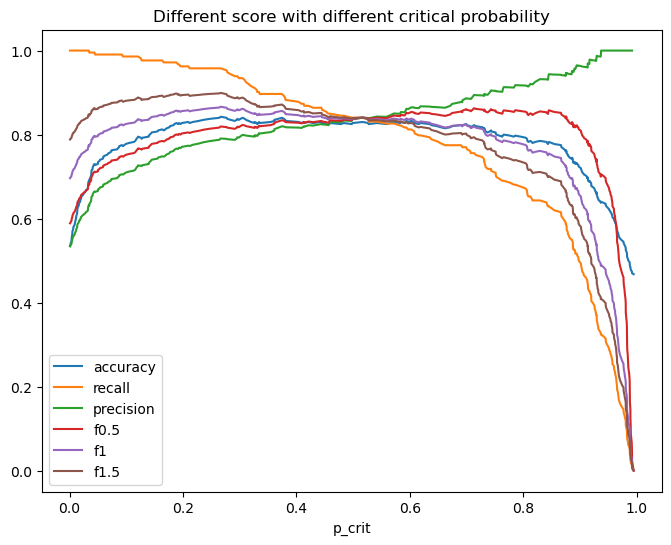

In [18]:
plt.figure(figsize=(8,6))
plt.plot(p_crits,accuracy)
plt.plot(p_crits,recall)
plt.plot(p_crits,precision)
plt.plot(p_crits,f_0_5)
plt.plot(p_crits,f_1)
plt.plot(p_crits,f_1_5)
plt.xlabel('p_crit')
plt.title('Different score with different critical probability')
plt.legend(['accuracy','recall','precision','f0.5','f1','f1.5'],loc='lower left')
plt.show()

### Problem 1c (3 points)

One of the curves you plotted is non-decreasing and another curve is non-increasing. Which evaluation metrics correspond to these two curves and why is this a problem when you try to tune the critical probability? Explain your answer in a few sentences.


**your explanation here**

Firstly, we write down the definition of recall and precision:

recall = TP / (TP+FN) = 1 / (1 + FN/TP)

precision = TP / (TP+FP) = 1 / (1 + FP/TP)

From the figure above, we could find that the line of recall score is non-incresing while the line of precision score is non-decreasing. This is because if the critical probability is larger, more datapoints would be predicted as class 0, so FN (false negative) would increase while TP would decease, then FN/TP would increase, so the sore of recall would decrease. Also, if the critical probability is larger, FP (false positive) and TP (true positive)would both decrease, however FP would decrease more, then FP/TP would decrease, so the score of precision would increase.

### Problem 2a (5 points)

Work with true_labels_pred_probs.csv again. 

Calculate the points on the ROC curve and plot it. 

Print out the best critical probability by finding the point on the ROC curve that's closest to the perfect classifier (0,1) point. 

Check out the wikipedia page of the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Further_interpretations) to read more about other ways to determine the best critical probability, and other ways to summarize the ROC curve.

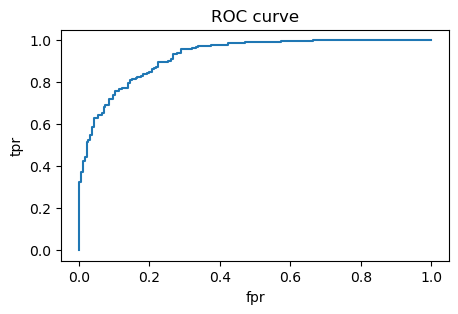

         fpr       tpr
0   0.000000  0.000000
1   0.000000  0.004695
2   0.000000  0.323944
3   0.005348  0.323944
4   0.005348  0.370892
..       ...       ...
85  0.572193  0.990610
86  0.572193  0.995305
87  0.663102  0.995305
88  0.663102  1.000000
89  1.000000  1.000000

[90 rows x 2 columns]
The minimum distance: 0.23652685220812739
The best post: fpr    0.149733
tpr    0.816901
Name: 42, dtype: float64
The best critical probability: 0.5967301685054103


In [19]:
# your code here 
from sklearn.metrics import roc_curve
# # the roc_curve function performs the same calculation
fpr,tpr,p_crits = roc_curve(y_true,pred_probs_class1)
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

dict = {"fpr":fpr,
       "tpr":tpr}

A = pd.DataFrame(dict)
print(A)
distance = np.sqrt((A['fpr']-0)**2+(A['tpr']-1)**2)
min_dist = np.min(distance)
best_point = A.loc[np.argmin(distance),:]
best_crit_prob = p_crits[np.argmin(distance)]
print('The minimum distance:',min_dist)
print('The best post:',best_point)
print('The best critical probability:',best_crit_prob)

### Problem 2b (10 points)

We discussed in class that the baseline accuracy of a classification model is equal to the fraction of points that belong to the most populous class. For example, if 80% of points belong to class 0 and 20% of points belong to class 1, we could predict class 0 for all points and the accuracy of our model would be 80%. Keep this concept and methodology in mind and answer the questions below.

Q1: How would you calculate the baseline f1 score in classification? Let's assume $n_0$ points are in class 0 and $n_1 = n - n_0$ points are in class 1 where $n$ is the number of points in your dataset, and $n_0 > n_1$ so class 1 is the minority class. Work out the solution on pen and paper. Include your logic below and express the f1 score using $p$ and/or $r$.

**your explanation here**

From the statement in the statement above, we have:

TN = 0,  FP = $n_0$,  FN = 0,  TP = $n_1$

Let's denote:

$n_1$ / ($n_1$ + $n_0$) = $n_1$ / $n$ = $p$

then: 

$n_0$ / ($n_1$ + $n_0$) = $n_0$ / $n$ = 1 - $p$,  and $n_0$ / $n_1$ = (1 - $p$) / $p$

So, P = TP / (TP + FP) = $n_1$ / ($n_1$ + $n_0$)

and R = TP / (TP + FN) = $n_1$ / ($n_1$ + 0) = 1.

Thus, $f_1$ = 2PR / (P+R) = 2 $n_1$ / (2 $n_1$ + $n_0$) = 2 $p$ / ($p$ + 1)

Q2: Generalize your Q1 solution to the f_beta score. Usually the f_beta score is used when the classification problem is imbalanced. Prepare a figure which shows the baseline f_beta score for beta = 0.5, 1, and 2 when the fraction of points that belong to class 0 is between 0.95 and 1 in the target variable. Use 51 linearly spaced values between 0.95 and 1.
Create a plot with three curves, one curve per beta value. Don't forget to add axes labels, a title, and a legend.

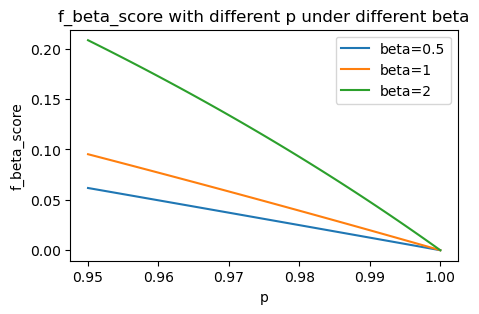

In [21]:
# your code here

def fbeta_score(beta,p):
    fbeta_score = (1+beta**2)*(1-p)/(beta**2*(1-p)+1)
    return fbeta_score

betas = np.array([0.5,1,2])
p = np.linspace(0.95,1,51)

plt.figure(figsize=(5,3))
for i in np.arange(len(betas)):
    plt.plot(p,fbeta_score(betas[i],p))
plt.xlabel('p')
plt.ylabel('f_beta_score')
plt.legend(['beta=0.5','beta=1','beta=2'])
plt.title('f_beta_score with different p under different beta')
plt.show()

### Problem 2c (10 points)

There are multiple ways to calculate the f1 score in a multiclass classification problem. Look up three different approaches and explain how to calculate them in a short description with equations. Create a simple toy dataset and calculate the f1 scores using sklearn. Discuss the pros and cons of each approach.

**your explanation here**

In a multiclass classification, there are three ways to calculate f1 score: 1. Micro-Averaging 2. Macro-Averaging 3. weighted_Averaging

1. **Micro-Averaging:**
   - Micro-averaging involves calculating the F1 score globally across all classes. It is suitable when there is a class imbalance, as it gives more weight to the larger classes.
   - Formulas:
     $$\text{Precision}_{\text{micro}} = \frac{\sum_{i=1}^{n} \text{TP}_i}{\sum_{i=1}^{n} (\text{TP}_i + \text{FP}_i)}$$
     $$\text{Recall}_{\text{micro}} = \frac{\sum_{i=1}^{n} \text{TP}_i}{\sum_{i=1}^{n} (\text{TP}_i + \text{FN}_i)}$$
     $$\text{F1}_{\text{micro}} = \frac{2 \times \text{Precision}_{\text{micro}} \times \text{Recall}_{\text{micro}}}{\text{Precision}_{\text{micro}} + \text{Recall}_{\text{micro}}}$$

2. **Macro-Averaging:**
   - Macro-averaging involves calculating the F1 score for each class independently and then taking the average. It treats all classes equally, regardless of their size.
   - Formulas:
     $$\text{Precision}_{\text{macro}} = \frac{1}{n} \sum_{i=1}^{n} \frac{\text{TP}_i}{\text{TP}_i + \text{FP}_i}$$
     $$\text{Recall}_{\text{macro}} = \frac{1}{n} \sum_{i=1}^{n} \frac{\text{TP}_i}{\text{TP}_i + \text{FN}_i}$$
     $$\text{F1}_{\text{macro}} = \frac{2 \times \text{Precision}_{\text{macro}} \times \text{Recall}_{\text{macro}}}{\text{Precision}_{\text{macro}} + \text{Recall}_{\text{macro}}}$$

3. **Weighted-Averaging:**
   - Weighted-averaging is similar to macro-averaging but takes into account the class imbalance by weighting the F1 score of each class by its support (the number of true instances).
   - Formulas:
     $$\text{Precision}_{\text{weighted}} = \frac{\sum_{i=1}^{n} w_i \times \frac{\text{TP}_i}{\text{TP}_i + \text{FP}_i}}{\sum_{i=1}^{n} w_i}$$
     $$\text{Recall}_{\text{weighted}} = \frac{\sum_{i=1}^{n} w_i \times \frac{\text{TP}_i}{\text{TP}_i + \text{FN}_i}}{\sum_{i=1}^{n} w_i} $$
     $$\text{F1}_{\text{weighted}} = \frac{2 \times \text{Precision}_{\text{weighted}} \times \text{Recall}_{\text{weighted}}}{\text{Precision}_{\text{weighted}} + \text{Recall}_{\text{weighted}}}$$

   Here, $w_i$ is the weight assigned to class $i$, often proportional to the number of instances in that class

   Each approach to calculating the F1 score in a multiclass classification problem —micro-averaging, macro-averaging, and weighted-averaging— comes with its own set of advantages and disadvantages. The choice between these approaches depends on the characteristics of our dataset and the specific goals of our evaluation.

**Micro-Averaging:**
- **Pros:**
  - Gives more weight to larger classes, which can be important in the presence of class imbalance.
  - Provides a single, global measure of performance across all classes.
- **Cons:**
  - May not be suitable if you want to assess the model's ability to perform well on smaller classes.
  - Might not reflect the performance of individual classes accurately.

**Macro-Averaging:**
- **Pros:**
  - Treats all classes equally, providing a balanced evaluation across different classes.
  - Particularly useful when you want to ensure that the model performs well on all classes, regardless of their size.
- **Cons:**
  - Can be sensitive to the performance of small classes, as they have an equal influence on the overall metric.

**Weighted-Averaging:**
- **Pros:**
  - Strikes a balance between micro and macro approaches by considering class imbalance with weights.
  - Allows you to assign more importance to the performance of specific classes based on their prevalence.
- **Cons:**
  - Requires careful selection of weights, and the choice of weights might impact the results.
  - The effectiveness of weighting depends on the appropriateness of the weights chosen.

In summary, the choice of F1 score averaging method depends on the specific characteristics of our data and our objectives. If we have a class-imbalanced dataset and want to emphasize the performance of larger classes, micro-averaging might be suitable. If we want equal representation of each class, macro-averaging is a good choice. Weighted-averaging provides a middle ground, allowing us to balance the impact of class imbalance while considering the performance of individual classes.

In [3]:
y_true = np.random.choice([0,1,2,3],size=100)
y_pred = np.random.choice([0,1,2,3],size=100)
print(y_true)
print(y_pred)

[3 0 1 1 2 3 2 3 2 3 2 3 2 3 2 1 2 2 1 0 3 1 2 3 3 0 1 1 2 2 1 3 3 0 3 3 0
 0 1 2 3 3 0 0 1 3 1 0 0 3 3 2 2 3 3 3 1 0 3 1 3 1 1 2 3 3 3 0 3 0 1 1 3 3
 2 1 0 0 0 1 0 2 0 2 0 2 1 2 0 0 3 3 1 3 2 0 0 0 3 2]
[1 2 1 1 1 0 1 3 1 1 1 3 3 1 2 1 2 3 2 1 0 2 2 3 3 3 1 0 1 1 0 0 2 1 1 3 1
 3 2 3 1 1 2 3 0 2 3 3 2 0 3 0 2 3 3 3 0 3 2 2 1 2 0 0 3 2 0 2 2 1 1 3 1 1
 2 1 3 3 0 0 3 2 3 0 0 0 2 1 0 0 3 3 3 1 1 0 2 0 0 0]


In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

f_beta_score_micro = fbeta_score(y_true,y_pred,beta=1,average='micro')
f_beta_score_macro = fbeta_score(y_true,y_pred,beta=1,average='macro')
f_beta_score_weighted = fbeta_score(y_true,y_pred,beta=1,average='weighted')
print('f_beta_score_micro:',f_beta_score_micro)
print('f_beta_score_macro:',f_beta_score_macro)
print('f_beta_score_weighted:',f_beta_score_weighted)

f_beta_score_micro: 0.4675
f_beta_score_macro: 0.3185689948892675
f_beta_score_weighted: 0.2978620102214651


### Problem 3 (5 points)

The true and predicted target variables of a regression problem are available in the `data/reg.cvs`. The goal of the model is to predict people's ages so the target variable's unit is year. 

We discussed the R2 score in class:

$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,
where $\bar{y}$ is the mean of $y$.

The baseline (or constant) regression model returns the mean of $y$ as prediction for all data points ($y_i' == \bar{y}$ for all $i$). So the baseline R2 score is 0.

Calculate and print the baseline R2, MSE, RMSE, and MAE, assuming that $y_i' == \bar{y}$ for all $i$. Make sure to include the units for each metric. 

Next, calculate and print the R2 score, MSE, RMSE, and MAE using the model predictions and add the units of the metrics.

In [23]:
# your code here
df = pd.read_csv('/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps5-XXXXiner/data/reg.csv')
df.head()

,y_true,y_pred
0,48.712290,49.582760
1,95.958573,92.968500
2,78.023503,78.941111
3,67.089996,47.214307
4,30.793529,28.596810


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_true = df['y_true']
y_pred= np.full(len(y_true),np.mean(y_true)) # Assuming that y_i = y_mean for all i

R2 = r2_score(y_true,y_pred)
MSE = mean_squared_error(y_true,y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_true,y_pred)

print('R2:',R2)
print('MSE:',MSE,'unit: year^2')
print('RMSE:',RMSE,'unit: year')
print('MAE:',MAE,'unit: year')


R2: 0.0
MSE: 589.1229249402501 unit: year^2
RMSE: 24.27185458386421 unit: year
MAE: 21.34778621318614 unit: year


In [27]:
y_true = df['y_true']
y_pred= df['y_pred']

R2 = r2_score(y_true,y_pred)
MSE = mean_squared_error(y_true,y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_true,y_pred)

print('R2:',R2)
print('MSE:',MSE,'unit: year^2')
print('RMSE:',RMSE,'unit: year')
print('MAE:',MAE,'unit: year')

R2: 0.8599431892772426
MSE: 82.51067799079387 unit: year^2
RMSE: 9.083538847321227 unit: year
MAE: 7.2111631295468 unit: year
